# <center> Tensorflow + Keras installation -- Test file

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from time import time

from tensorflow.keras.models import Model, load_model, save_model
from tensorflow.keras.layers import Dense, Activation, Input, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical

from plotmatrix import pretty_plot_confusion_matrix, PlotMatrix

### Download MNIST dataset

In [2]:
from tensorflow.keras.datasets import mnist

# download and read data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### Pre-processing data

In [3]:
# reshape and normalisation
train_images = train_images.reshape((-1, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((-1, 28, 28, 1))
test_images = test_images.astype('float32') / 255

data_shape = train_images.shape[1:]

# one-hot encoding
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels  = to_categorical(test_labels)

Using TensorFlow backend.


In [4]:
print('train images shape:', train_images.shape)
print('test images shape:', test_images.shape)

print('train labels shape:', train_labels.shape)
print('test labels shape:', test_labels.shape)

# data shape (sin la dimensión del batch_size)
print('data shape:', data_shape)

train images shape: (60000, 28, 28, 1)
test images shape: (10000, 28, 28, 1)
train labels shape: (60000, 10)
test labels shape: (10000, 10)
data shape: (28, 28, 1)


### Creating a (tiny) Keras model

In [5]:
def cNN(input_shape):
    I = Input(shape=input_shape, name='input')
    X = Conv2D(16, kernel_size=(3,3), activation='relu', name='conv1')(I)
    X = MaxPooling2D(pool_size=(2,2), name='maxpool1')(X)
    X = Conv2D(32, kernel_size=(3,3), activation='relu', name='conv2')(X)
    X = MaxPooling2D(pool_size=(2,2), name='maxpool2')(X)
    X = Conv2D(64, kernel_size=(3,3), activation='relu', name='conv3')(X)
    X = Flatten(name='flatten')(X)
    X = Dense(64, activation='relu', name='dense')(X)
    X = Dense(10, activation='softmax', name='classifier')(X)
    
    model = Model(I, X)
    return model

In [6]:
# this line delete the model if exist in memory
if 'convnet' in globals(): del convnet

# create new model
convnet = cNN(data_shape)

In [7]:
# print summary
convnet.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 26, 26, 16)        160       
_________________________________________________________________
maxpool1 (MaxPooling2D)      (None, 13, 13, 16)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 11, 11, 32)        4640      
_________________________________________________________________
maxpool2 (MaxPooling2D)      (None, 5, 5, 32)          0         
_________________________________________________________________
conv3 (Conv2D)               (None, 3, 3, 64)          18496     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0     

### Training

In [8]:
# setting optimizers, learning rate,
# loss function and metrics

opt = optimizers.RMSprop(lr=0.001)
convnet.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# training model (just 5 epochs)

history = convnet.fit(train_images, train_labels, epochs=5, batch_size=128, validation_split=0.16666)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 3s 54us/sample - loss: 0.2846 - accuracy: 0.9109 - val_loss: 0.1071 - val_accuracy: 0.9668
Epoch 2/5
50000/50000 [==============================] - 1s 24us/sample - loss: 0.0697 - accuracy: 0.9781 - val_loss: 0.0559 - val_accuracy: 0.9838
Epoch 3/5
50000/50000 [==============================] - 1s 25us/sample - loss: 0.0462 - accuracy: 0.9856 - val_loss: 0.0655 - val_accuracy: 0.9805
Epoch 4/5
50000/50000 [==============================] - 1s 24us/sample - loss: 0.0346 - accuracy: 0.9890 - val_loss: 0.0459 - val_accuracy: 0.9860
Epoch 5/5
50000/50000 [==============================] - 1s 25us/sample - loss: 0.0283 - accuracy: 0.9907 - val_loss: 0.0495 - val_accuracy: 0.9851


### Evaluating results

In [10]:
# evaluate net with the test set

results = convnet.evaluate(test_images, test_labels, verbose=0)
print('test loss: {} WOW!'.format(results[0]))
print('test accuracy: {} Otro WOW!'.format(results[1]))

test loss: 0.042080739601148526 WOW!
test accuracy: 0.9866999983787537 Otro WOW!


### Display training history plots

In [11]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

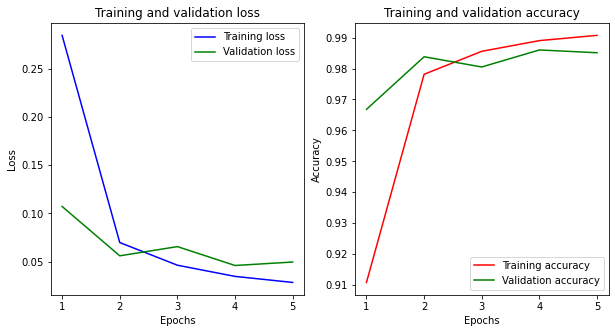

In [12]:
# plot training history

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

# figure
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Results

In [13]:
# predict test image labels

pred = convnet.predict(test_images)
predictions = np.argmax(pred, 1)

In [14]:
# set labels as the index with highest probability
test_labs = np.argmax(test_labels, 1)

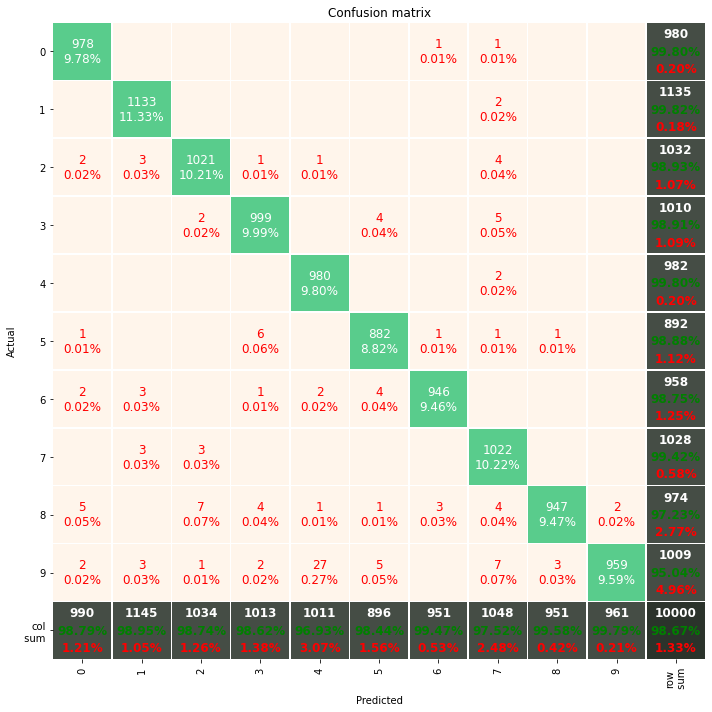

In [15]:
# compute confusion matrix

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(test_labs, predictions)

cf = pd.DataFrame(CM)
pretty_plot_confusion_matrix(cf, annot=True, pred_val_axis='x', figsize=(10,10), fz=12)

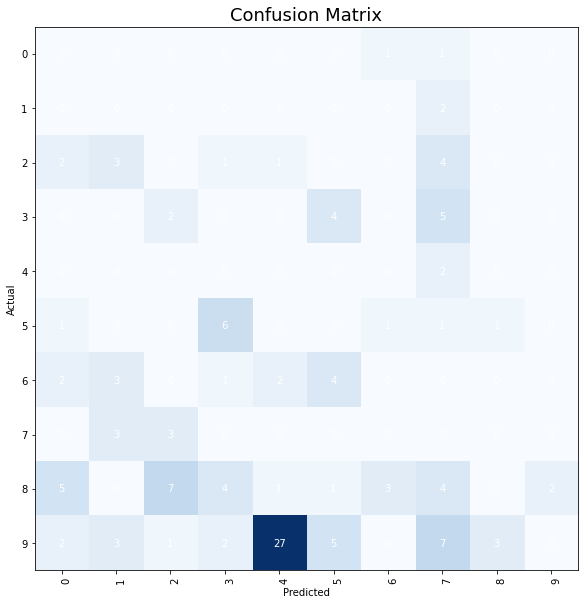

In [16]:
# other plot of comfusion matrix

PlotMatrix(CM, figsize=(10,10), cmap=plt.cm.Blues, title='Confusion Matrix', fz=15)